#1.  Завдання щодо генерації текстів або машинного перекладу (на вибір) на базі рекурентних мереж або трансформерів (на вибір). Вирішіть завдання щодо генерації текстів або машинного перекладу. Особливо вітаються україномовні моделі.
Датасети для перекладу можна брати тут: https://www.manythings.org/anki/
---
Тексти українською для навчання генеративних моделей: https://www.kaggle.com/datasets/mykras/ukrainian-texts
---

In [ ]:
# Завантаження архіву з Google Drive
!pip install gdown tensorflow

import gdown

file_id = "1U6r-n1jlHIklVZti8g1fN7GdgQXLiVao"
url = f"https://drive.google.com/uc?id={file_id}"

output = "Ukrainian_Texts.zip"

gdown.download(url, output, quiet=False)

!unzip -q Ukrainian_Texts.zip -d ./data_texts

#  Зчитування всіх текстових файлів
import os

texts = ""

folder = "./data_texts"

for fname in os.listdir(folder):
    if fname.endswith(".txt"):
        with open(os.path.join(folder, fname), "r", encoding="utf-8") as f:
            texts += f.read().lower() + "\n"

print("Кількість символів у тексті:", len(texts))
texts[:1000]

#  Чищення тексту
import re

# Видаляємо зайві символи, залишаємо українські букви, пунктуацію та пробіли
clean_text = re.sub(r'[^а-щьюяєіїґa-z0-9.,!?;:\-\s\n]', ' ', texts)
clean_text = re.sub(r'\s+', ' ', clean_text)

print("Очищено символів:", len(clean_text))
clean_text[:500]

# Створення char-level токенізації
chars = sorted(list(set(clean_text)))
vocab_size = len(chars)

print("Розмір словника (символи):", vocab_size)
print(chars)

# символ → індекс
char2idx = {c: i for i, c in enumerate(chars)}
idx2char = {i: c for i, c in enumerate(chars)}

encoded_text = [char2idx[c] for c in clean_text]
len(encoded_text)

# Формування навчальних послідовностей
import numpy as np

seq_length = 100
step = 1

X = []
y = []

for i in range(0, len(encoded_text) - seq_length, step):
    X.append(encoded_text[i:i + seq_length])
    y.append(encoded_text[i + seq_length])

X = np.array(X)
y = np.array(y)

print("Форма X:", X.shape)
print("Форма y:", y.shape)

# Побудова моделі LSTM для генерації тексту
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

model = Sequential([
    Embedding(vocab_size, 256, input_length=seq_length),
    LSTM(256, return_sequences=False),
    Dense(vocab_size, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam"
)

model.summary()

# Навчання моделі
history = model.fit(
    X, y,
    batch_size=128,
    epochs=15
)

# Функція генерації тексту
import numpy as np

def generate_text(model, seed_text, length=400, temperature=0.7):
    text_generated = seed_text.lower()

    for _ in range(length):
        # токенізуємо seed
        encoded = [char2idx.get(c, 0) for c in text_generated[-seq_length:]]

        # доповнюємо, якщо не вистачає символів
        if len(encoded) < seq_length:
            encoded = [0]*(seq_length - len(encoded)) + encoded

        x = np.array(encoded).reshape(1, -1)

        # прогноз
        preds = model.predict(x, verbose=0)[0]

        # керування "креативністю"
        preds = np.asarray(preds).astype('float64')
        preds = np.log(preds + 1e-8) / temperature
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)

        next_index = np.random.choice(len(preds), p=preds)
        next_char = idx2char[next_index]

        text_generated += next_char

    return text_generated

# Генерація українського тексту

seed = "україна — це"

generated = generate_text(model, seed_text=seed, length=600, temperature=0.65)

print(generated)


Downloading...
From: https://drive.google.com/uc?id=1U6r-n1jlHIklVZti8g1fN7GdgQXLiVao
To: /content/Ukrainian_Texts.zip
100%|██████████| 742k/742k [00:00<00:00, 7.90MB/s]


Кількість символів у тексті: 1317362
Очищено символів: 1278159
Розмір словника (символи): 77
[' ', '!', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ь', 'ю', 'я', 'є', 'і', 'ї', 'ґ']
Форма X: (1278059, 100)
Форма y: (1278059,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
9985/9985 ━━━━━━━━━━━━━━━━━━━━ 185s 18ms/step - loss: 2.3282
Epoch 2/15
9985/9985 ━━━━━━━━━━━━━━━━━━━━ 181s 18ms/step - loss: 1.8152
Epoch 3/15
9985/9985 ━━━━━━━━━━━━━━━━━━━━ 181s 18ms/step - loss: 1.7066
Epoch 4/15
9985/9985 ━━━━━━━━━━━━━━━━━━━━ 181s 18ms/step - loss: 1.6509
Epoch 5/15
9985/9985 ━━━━━━━━━━━━━━━━━━━━ 182s 18ms/step - loss: 1.6132
Epoch 6/15
9985/9985 ━━━━━━━━━━━━━━━━━━━━ 181s 18ms/step - loss: 1.5857
Epoch 7/15
9985/9985 ━━━━━━━━━━━━━━━━━━━━ 182s 18ms/step - loss: 1.5629
Epoch 8/15
9985/9985 ━━━━━━━━━━━━━━━━━━━━ 182s 18ms/step - loss: 1.5440
Epoch 9/15
9985/9985 ━━━━━━━━━━━━━━━━━━━━ 182s 18ms/step - loss: 1.5307
Epoch 10/15
9985/9985 ━━━━━━━━━━━━━━━━━━━━ 181s 18ms/step - loss: 1.5173
Epoch 11/15
9985/9985 ━━━━━━━━━━━━━━━━━━━━ 181s 18ms/step - loss: 1.5083
Epoch 12/15
9985/9985 ━━━━━━━━━━━━━━━━━━━━ 181s 18ms/step - loss: 1.4973
Epoch 13/15
9985/9985 ━━━━━━━━━━━━━━━━━━━━ 181s 18ms/step - loss: 1.4914
Epoch 14/15
9985/9985 ━━━━━━━━━━━━━━━━━━━━ 181s 18ms/step - 

# 2.Завдання щодо генерації або стилізації зображень (на вибір) Вирішіть завдання перенесення стилю (NST) або генерації зображень (архітектура за вашим вибором: GAN/DCGAN/VAE/Diffusion).
Датасети: можна брати CIFAR-100, Fashion MNIST або тут: https://www.kaggle.com/tags/image-data
---

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar100/incomplete.EYFC4L_3.0.2/cifar100-train.tfrecord*...:   0%|       …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar100/incomplete.EYFC4L_3.0.2/cifar100-test.tfrecord*...:   0%|        …

Dataset cifar100 downloaded and prepared to /root/tensorflow_datasets/cifar100/3.0.2. Subsequent calls will reuse this data.


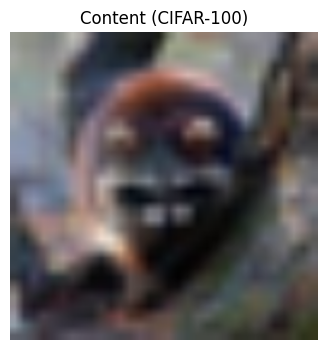

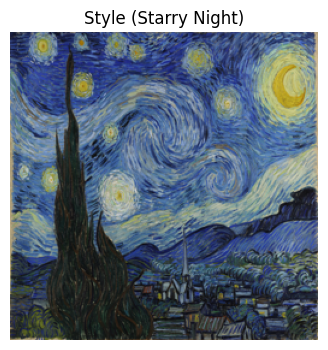

Loading NST model...
Model loaded.


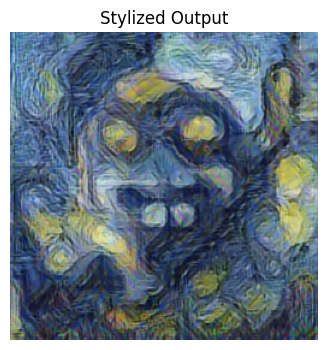

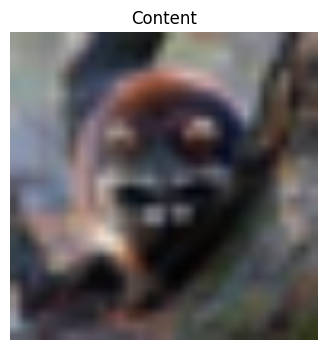

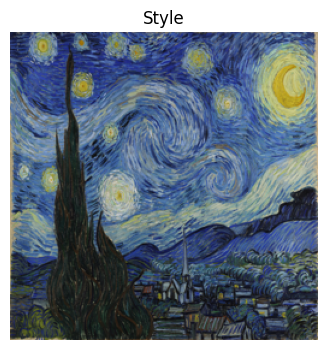

In [10]:
# Neural Style Transfer: CIFAR-100 content + Starry Night style

!pip install -q tensorflow tensorflow-hub tensorflow-datasets pillow matplotlib pandas

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Функції для відображення
def show_image(img, title=None):
    if isinstance(img, tf.Tensor):
        img = img.numpy()
    if img.ndim == 4:
        img = img.squeeze(0)
    plt.figure(figsize=(4,4))
    plt.imshow(np.clip(img, 0, 1))
    if title:
        plt.title(title)
    plt.axis("off")
    plt.show()

# CONTENT IMAGE → CIFAR-100
ds = tfds.load("cifar100", split="train", shuffle_files=True, as_supervised=True)
for image, label in ds.take(1):
    content = image.numpy()

content = Image.fromarray(content).resize((256, 256), Image.BILINEAR)
content_np = np.array(content).astype(np.float32) / 255.0
show_image(content_np, "Content (CIFAR-100)")

# STYLE IMAGE → Google Drive через пряме посилання
url = 'https://drive.google.com/file/d/1dxCSHz7NLWCnvIg1gI1nzIvU7LBl1JbL/view?usp=sharing'
url_ = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

response = requests.get(url_, timeout=10)
response.raise_for_status()
style_img = Image.open(BytesIO(response.content)).convert("RGB").resize((256, 256))
style_np = np.array(style_img).astype(np.float32) / 255.0
show_image(style_np, "Style (Starry Night)")

# Підготовка тензорів
content_tensor = tf.constant(content_np[None, ...], dtype=tf.float32)
style_tensor   = tf.constant(style_np[None, ...], dtype=tf.float32)

# Завантаження моделі NST
print("Loading NST model...")
hub_model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")
print("Model loaded.")

# Виконання стилізації
stylized_tensor = hub_model(content_tensor, style_tensor)[0]

# Відображення результату
show_image(stylized_tensor, "Stylized Output")
show_image(content_tensor, "Content")
show_image(style_tensor, "Style")


# 3. Проведіть експерименти з моделями бібліотеки Hugging Face (https://huggingface.co/) (2 завдання з 3х на ваш вибір)
a) Візьміть свій датасет для класифікації текстів (з другої лабораторної роботи).
Використайте модуль pipeline для запуску готових моделей, оберіть мінімум дві моделі.
Прогоніть ваші тексти через обрані моделі та збережіть результати.
Оцініть якість класифікації: accuracy; classification report (precision, recall, F1).
Зробіть висновки: Яка модель дала кращий результат? Порівняйте зі своїми даним з 2 лабораторної роботи.
---

In [9]:
import gdown
import pandas as pd
import numpy as np
import re, string
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, classification_report
from transformers import pipeline
import torch
from tqdm import tqdm

# Device setup
device = 0 if torch.cuda.is_available() else -1
print("Torch device:", torch.cuda.get_device_name(0) if device == 0 else "CPU")

# Download dataset
file_id = "1IwcM9-Dyir1O2JhOxgnRo3Tb9xAt8lWP"
output = "reviews.txt"

print("Downloading...")
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

# Load dataset
with open(output, 'r', encoding='utf-8') as f:
    lines = f.read().splitlines()

data = pd.DataFrame(lines, columns=['text'])

# Extract label + text
data['label'] = data['text'].apply(lambda x: x.split(' ')[0])
data['text'] = data['text'].apply(lambda x: ' '.join(x.split(' ')[1:]))
data['label'] = data['label'].replace({'__label__1': 'negative', '__label__2': 'positive'})

print("\nБаланс класів:")
print(data['label'].value_counts())

# Light text cleaning (keep emojis, urls, hashtags)
nltk.download('stopwords')
stop_words = stopwords.words("english")

def light_clean_text(text):
    text = text.lower()
    # only remove punctuation except # and @
    text = re.sub(r"[%s]" % re.escape(string.punctuation.replace("#", "").replace("@", "")), " ", text)
    text = re.sub(r"\s{2,}", " ", text)
    # remove stopwords
    text = ' '.join([w for w in text.split() if w not in stop_words])
    return text.strip()

data['clean_text'] = data['text'].apply(light_clean_text)

# Increase sample size for stability
sample_df = data.sample(3000, random_state=42).reset_index(drop=True)
print("\nРядків у вибірці:", len(sample_df))

# Evaluate models with batching
results = {}

# Model 1 – DistilBERT
print("\n========== МОДЕЛЬ: DistilBERT ==========\n")

model_name = "distilbert-base-uncased-finetuned-sst-2-english"
classifier = pipeline("text-classification", model=model_name, device=device, truncation=True)

y_pred = []
batch_size = 32
for i in tqdm(range(0, len(sample_df), batch_size), desc="Predicting DistilBERT"):
    batch_texts = sample_df['clean_text'].iloc[i:i+batch_size].tolist()
    outputs = classifier(batch_texts)
    for out in outputs:
        pred = "positive" if out['label'] == "POSITIVE" else "negative"
        y_pred.append(pred)

acc = accuracy_score(sample_df["label"], y_pred)
print("Accuracy:", acc)
print(classification_report(sample_df["label"], y_pred))
results["DistilBERT"] = acc

# Model 2 – RoBERTa (fixed mapping)
print("\n========== МОДЕЛЬ: RoBERTa ==========\n")

model_name = "textattack/roberta-base-SST-2"
classifier = pipeline("text-classification", model=model_name, device=device, truncation=True)

label_map = {
    "LABEL_0": "negative",
    "LABEL_1": "positive"
}

y_pred = []
for i in tqdm(range(0, len(sample_df), batch_size), desc="Predicting RoBERTa"):
    batch_texts = sample_df['clean_text'].iloc[i:i+batch_size].tolist()
    outputs = classifier(batch_texts)
    for out in outputs:
        y_pred.append(label_map[out['label']])

acc = accuracy_score(sample_df["label"], y_pred)
print("Accuracy:", acc)
print(classification_report(sample_df["label"], y_pred))
results["RoBERTa"] = acc

# Summary
print("\n===== ПІДСУМКОВІ РЕЗУЛЬТАТИ =====")
print(results)

print("\n===== ПОРІВНЯННЯ З ЛР2 =====")
print("Точність ЛР2: 0.8434")


Torch device: Tesla T4
Downloading...


Downloading...
From (original): https://drive.google.com/uc?id=1IwcM9-Dyir1O2JhOxgnRo3Tb9xAt8lWP
From (redirected): https://drive.google.com/uc?id=1IwcM9-Dyir1O2JhOxgnRo3Tb9xAt8lWP&confirm=t&uuid=b531bf78-99e0-48f4-9221-82abcca80e51
To: /content/reviews.txt
100%|██████████| 177M/177M [00:00<00:00, 202MB/s]



Баланс класів:
label
positive    200000
negative    200000
Name: count, dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Рядків у вибірці: 3000

========== МОДЕЛЬ: DistilBERT ==========



Device set to use cuda:0
Predicting DistilBERT: 100%|██████████| 94/94 [00:21<00:00,  4.33it/s]


Accuracy: 0.8083333333333333
              precision    recall  f1-score   support

    negative       0.76      0.90      0.82      1499
    positive       0.87      0.72      0.79      1501

    accuracy                           0.81      3000
   macro avg       0.82      0.81      0.81      3000
weighted avg       0.82      0.81      0.81      3000


========== МОДЕЛЬ: RoBERTa ==========



Some weights of the model checkpoint at textattack/roberta-base-SST-2 were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0
Predicting RoBERTa: 100%|██████████| 94/94 [00:29<00:00,  3.23it/s]

Accuracy: 0.859
              precision    recall  f1-score   support

    negative       0.86      0.86      0.86      1499
    positive       0.86      0.86      0.86      1501

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000


===== ПІДСУМКОВІ РЕЗУЛЬТАТИ =====
{'DistilBERT': 0.8083333333333333, 'RoBERTa': 0.859}

===== ПОРІВНЯННЯ З ЛР2 =====
Точність ЛР2: 0.8434


#b) Знайдіть українські мовні моделі, наведіть приклади роботи з ними (через pipeline) на завданнях (zero-shot-classification, summarization, translation).


In [2]:
!pip install transformers sentencepiece --quiet

from transformers import pipeline


# ZERO-SHOT CLASSIFICATION (класифікація без навчання)
# Модель: MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7
zero_shot = pipeline(
    "zero-shot-classification",
    model="MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7"
)

text = "Цей телефон працює дуже повільно і постійно зависає."
labels = ["позитивний", "негативний", "нейтральний"]

print("===== ZERO-SHOT RESULT =====")
result_zero = zero_shot(text, candidate_labels=labels)
print(result_zero)


# TRANSLATION (українська → англійська)
# Модель: Helsinki-NLP/opus-mt-uk-en
translator = pipeline(
    "translation",
    model="Helsinki-NLP/opus-mt-uk-en"
)

text_uk = "Машинне навчання змінює сучасний світ і відкриває нові можливості."

print("\n===== TRANSLATION RESULT =====")
translation = translator(text_uk)
print(translation)


# SUMMARIZATION (стиснення тексту)
# Модель: csebuetnlp/mT5_multilingual_XLSum
summarizer = pipeline(
    "summarization",
    model="csebuetnlp/mT5_multilingual_XLSum"
)

text_long = """
Україна активно розвиває цифрові технології в різних сферах,
включаючи освіту, медицину, державне управління та безпеку.
Ініціативи цифрової трансформації спрямовані на підвищення
ефективності роботи державних органів та покращення якості
послуг для громадян. Однією з ключових переваг цифровізації
є можливість швидкого доступу до інформації, автоматизація
процесів та зменшення бюрократії.
"""

print("\n===== SUMMARIZATION RESULT =====")
summary = summarizer(text_long, max_length=50, min_length=20)
print(summary)


Device set to use cpu


===== ZERO-SHOT RESULT =====
{'sequence': 'Цей телефон працює дуже повільно і постійно зависає.', 'labels': ['негативний', 'нейтральний', 'позитивний'], 'scores': [0.8060718774795532, 0.16288621723651886, 0.03104187361896038]}


Device set to use cpu



===== TRANSLATION RESULT =====
[{'translation_text': 'Machine learning is changing the modern world and opening up new opportunities.'}]


Device set to use cpu



===== SUMMARIZATION RESULT =====
[{'summary_text': 'Цього року в Україні відзначають День цифрової трансформації. Про це йдеться у повідомленні Державної служби з надзвичайних ситуацій.'}]
